In [4]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [1]:
!pip install -q -U keras-tuner

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
warnings.filterwarnings('ignore')
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import pandas as pd


<ipython-input-2-fa7843284402>:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
from google.colab import files
# uploaded = files.upload()

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
train_data = pd.read_csv("https://adg6610.uta.cloud/dataset/ml_dataset/train.csv")
test_data = pd.read_csv("https://adg6610.uta.cloud/dataset/ml_dataset/test.csv")

# Step 1: Inspect Data
print("Training Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())




Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


In [5]:
print("\nTraining Data Summary:")
print(train_data.describe())


Training Data Summary:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.0000

In [6]:
# 2. Check for missing values in training and test data
print("Missing Values in Training Data:")
print(train_data.isnull().sum().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum().sum())


Missing Values in Training Data:
0

Missing Values in Test Data:
0


In [7]:
# Step 3: Handle Duplicates
# Check for duplicate rows in both datasets
print("\nNumber of Duplicate Rows in Training Data:", train_data.duplicated().sum())
print("Number of Duplicate Rows in Test Data:", test_data.duplicated().sum())


Number of Duplicate Rows in Training Data: 0
Number of Duplicate Rows in Test Data: 0


In [8]:
# 4. Standardize column names
# Replace special characters with underscores
def clean_column_names(columns):
    return (columns
            .str.replace(r"[\(\)-]", "_", regex=True)  # Replace parentheses and dashes with underscores
            .str.replace(r",", "_", regex=True)       # Replace commas with underscores
            .str.strip()                              # Remove leading/trailing whitespaces
            .str.replace("__", "_")                  # Replace double underscores with single underscore
           )

# Apply to both train and test datasets
train_data.columns = clean_column_names(train_data.columns)
test_data.columns = clean_column_names(test_data.columns)

print("Updated Column Names (Train):\n", train_data.columns)




Updated Column Names (Train):
 Index(['tBodyAcc_mean__X', 'tBodyAcc_mean__Y', 'tBodyAcc_mean__Z',
       'tBodyAcc_std__X', 'tBodyAcc_std__Y', 'tBodyAcc_std__Z',
       'tBodyAcc_mad__X', 'tBodyAcc_mad__Y', 'tBodyAcc_mad__Z',
       'tBodyAcc_max__X',
       ...
       'fBodyBodyGyroJerkMag_kurtosis_', 'angle_tBodyAccMean_gravity_',
       'angle_tBodyAccJerkMean_gravityMean_',
       'angle_tBodyGyroMean_gravityMean_',
       'angle_tBodyGyroJerkMean_gravityMean_', 'angle_X_gravityMean_',
       'angle_Y_gravityMean_', 'angle_Z_gravityMean_', 'subject', 'Activity'],
      dtype='object', length=563)


In [9]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [10]:
test_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [11]:
#ids
train_data['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [12]:
test_data['subject'].unique()

array([ 2,  4,  9, 10, 12, 13, 18, 20, 24])

In [13]:
# 5. Encode the target variable (Activity column)
label_encoder = LabelEncoder()
train_data["Activity"] = label_encoder.fit_transform(train_data["Activity"])
test_data["Activity"] = label_encoder.transform(test_data["Activity"])
print("Encoded Activity Classes:", label_encoder.classes_)


Encoded Activity Classes: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [14]:
# Identify feature columns (exclude 'subject' and 'Activity')
feature_columns = train_data.columns[:-2]  # All columns except the last two ('subject' and 'Activity')

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the feature columns in training and test data
train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])
test_data[feature_columns] = scaler.transform(test_data[feature_columns])

# Split the data into features (X) and target (y)
X_train = train_data[feature_columns]  # Features
y_train = train_data["Activity"]       # Target
X_test = test_data[feature_columns]    # Features
y_test = test_data["Activity"]         # Target

# Verify the shapes of the processed data
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Test Features Shape:", X_test.shape)
print("Test Target Shape:", y_test.shape)


Training Features Shape: (7352, 561)
Training Target Shape: (7352,)
Test Features Shape: (2947, 561)
Test Target Shape: (2947,)


In [15]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
# One-hot encode the target variable
y_train_categorical = to_categorical(y_train, num_classes=6)  # Assuming 6 unique activities
y_test_categorical = to_categorical(y_test, num_classes=6)

print("Shape of y_train_categorical:", y_train_categorical.shape)
print("Shape of y_test_categorical:", y_test_categorical.shape)


Shape of y_train_categorical: (7352, 6)
Shape of y_test_categorical: (2947, 6)


In [17]:
# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(6, activation='softmax')  # Output layer (6 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          71,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,582 (314.77 KB)

 Trainable params: 80,582 (314.77 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train_categorical,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test_categorical),
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5173 - loss: 1.1085 - val_accuracy: 0.8212 - val_loss: 0.4013
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8511 - loss: 0.3800 - val_accuracy: 0.8965 - val_loss: 0.2443
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8913 - loss: 0.2738 - val_accuracy: 0.9084 - val_loss: 0.2205
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9268 - loss: 0.1938 - val_accuracy: 0.9209 - val_loss: 0.1975
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9261 - loss: 0.1914 - val_accuracy: 0.9230 - val_loss: 0.1809
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9473 - loss: 0.1471 - val_accuracy: 0.9379 - val_loss: 0.1631
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9548 - loss: 0.1218 - val_accuracy: 0.9304 - val_loss: 0.1723
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.1148 - val_accuracy: 0

In [19]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.1345
Test Accuracy: 0.9501


In [20]:
# Generate predictions on the test data
y_pred_categorical = model.predict(X_test)  # Predict probabilities
y_pred = tf.argmax(y_pred_categorical, axis=1).numpy()  # Convert probabilities to class labels



93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [21]:
# Debug the target_names
print("Target Names:", label_encoder.classes_)
print("Target Names Type:", type(label_encoder.classes_))

# Convert target_names to a list of strings
target_names = list(map(str, label_encoder.classes_))

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Target Names: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Target Names Type: <class 'numpy.ndarray'>

Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.92      0.93      0.92       491
          STANDING       0.92      0.93      0.92       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.94      0.98      0.96       420
  WALKING_UPSTAIRS       0.96      0.92      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947


Confusion Matrix:
[[528   0   9   0   0   0]
 [  0 455  34   0   0   2]
 [  0  39 493   0   0   0]
 [  0   0   0 479  10   7]
 [  0   0   0   3 410   7]
 [  0   0   0  20  16 435]]


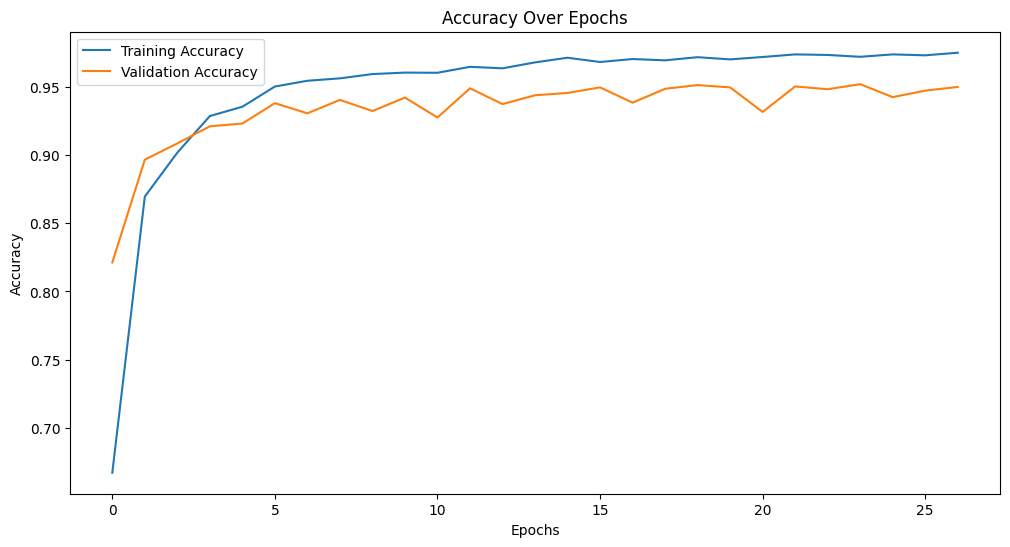

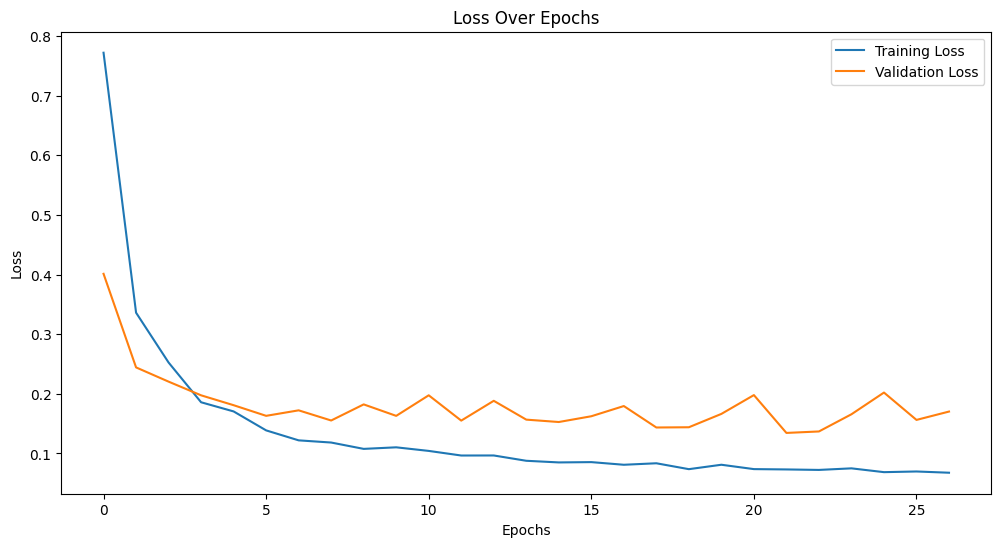

In [22]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.6671653985977173, 0.8694232702255249, 0.9016594290733337, 0.9284548163414001, 0.9352557063102722, 0.9500815868377686, 0.9542981386184692, 0.956066370010376, 0.9591947793960571, 0.9602829217910767, 0.9601469039916992, 0.9644994735717773, 0.9634113311767578, 0.9677639007568359, 0.9711642861366272, 0.9680359363555908, 0.9702121615409851, 0.969260036945343, 0.9715723395347595, 0.9699401259422302, 0.971708357334137, 0.9736126065254211, 0.9732045531272888, 0.9718443751335144, 0.9736126065254211, 0.9729325175285339, 0.9748367667198181]
[0.8211740851402283, 0.8965049386024475, 0.9083814024925232, 0.9209365248680115, 0.9229725003242493, 0.9379029273986816, 0.9304377436637878, 0.9402782320976257, 0.9321343898773193, 0.9419748783111572, 0.9273837804794312, 0.9487614631652832, 0.937224268913269, 0.9436715245246887, 0.9453681707382202, 0.9494401216506958, 0.9382422566413879, 0.9484221339225769, 0.9511367678642273, 0.9494401216506958, 0.9314557313919067, 0.9501187801361084, 0.9480828046798706, 0.

In [24]:
# Define individual models
model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)

# Evaluate RandomForestClassifier
model1.fit(X_train, y_train)
y_pred_rf = model1.predict(X_test)
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Evaluate LogisticRegression
model2.fit(X_train, y_train)
y_pred_lr = model2.predict(X_test)
print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Evaluate SVC
model3.fit(X_train, y_train)
y_pred_svc = model3.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))


# Define the Voting Classifier
ensemble = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('svc', model3)], voting='soft')
ensemble.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

#print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


RandomForest Accuracy: 0.9267051238547676
LogisticRegression Accuracy: 0.9535120461486257
SVC Accuracy: 0.9480827960637936
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.89      0.92       491
          STANDING       0.91      0.96      0.94       532
           WALKING       0.95      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.96       420
  WALKING_UPSTAIRS       0.94      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
[[537   0   0   0   0   0]
 [  0 439  49   0   0   3]
 [  0  21 511   0   0   0]
 [  0   0   0 488   4   4]
 [  0   0   0   7 391  22]
 [  0   0   0  16   2 453]]


In [25]:
##Hyperparameter Tuning using Grid Search CV
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassifier parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# LogisticRegression parameter grid
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

# SVC parameter grid
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}



In [26]:
# Hyperparameter tuning for RandomForestClassifier
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
print("Best RandomForest Parameters:", rf_grid_search.best_params_)

# Hyperparameter tuning for LogisticRegression
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)
best_lr = lr_grid_search.best_estimator_
print("Best LogisticRegression Parameters:", lr_grid_search.best_params_)

# Hyperparameter tuning for SVC
svc_grid_search = GridSearchCV(SVC(probability=True), svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)
best_svc = svc_grid_search.best_estimator_
print("Best SVC Parameters:", svc_grid_search.best_params_)


Best RandomForest Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best LogisticRegression Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best SVC Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [27]:
# Define the Voting Classifier with tuned models
ensemble = VotingClassifier(
    estimators=[('rf', best_rf), ('lr', best_lr), ('svc', best_svc)],
    voting='soft'
)

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Evaluate the ensemble
y_pred = ensemble.predict(X_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

#print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.89      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947

Confusion Matrix:
[[537   0   0   0   0   0]
 [  0 435  55   0   0   1]
 [  0   7 524   1   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 406  10]
 [  0   0   0  19   0 452]]


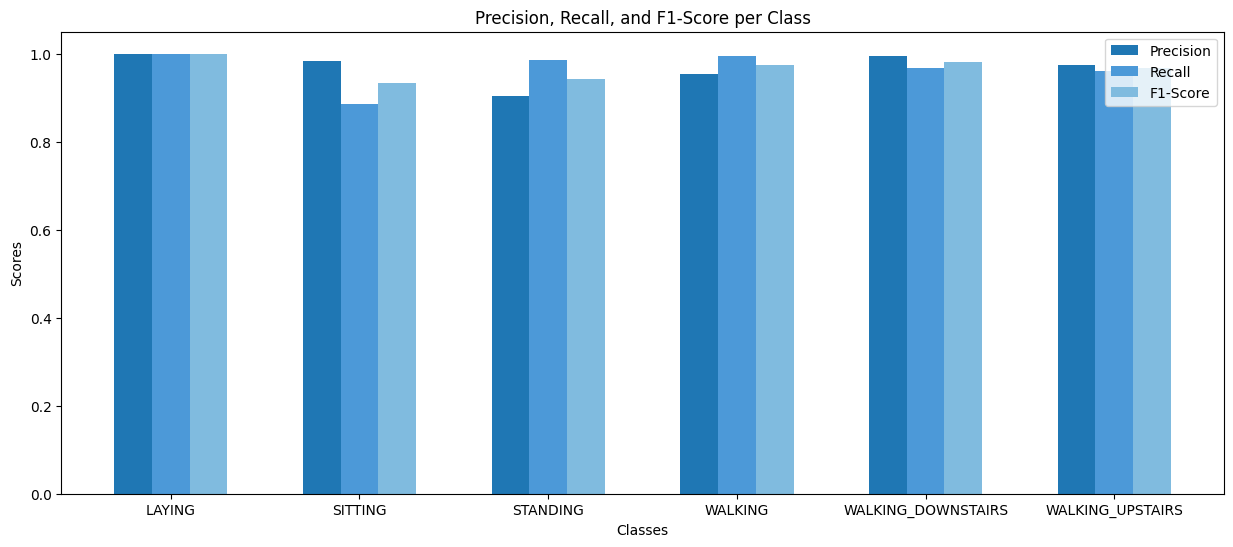

In [28]:
# Assuming you have label_encoder and y_test is already encoded
target_names = list(map(str, label_encoder.classes_))  # Get the target names as strings

# Metrics for Precision, Recall, and F1-Score
metrics = {
    'Precision': precision_score(y_test, y_pred, average=None),
    'Recall': recall_score(y_test, y_pred, average=None),
    'F1-Score': f1_score(y_test, y_pred, average=None)
}

# Plot Precision, Recall, and F1-Score
x = np.arange(len(target_names))  # Use target_names for x-ticks

fig, ax = plt.subplots(figsize=(15, 6))

# Using different shades of blue
blue_shades = ['#1f77b4', '#4c99d8', '#80bbdf']  # Light to dark shades of blue

width = 0.2  # Bar width
ax.bar(x - width, metrics['Precision'], width, label='Precision', color=blue_shades[0])
ax.bar(x, metrics['Recall'], width, label='Recall', color=blue_shades[1])
ax.bar(x + width, metrics['F1-Score'], width, label='F1-Score', color=blue_shades[2])

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.set_xticks(x)
ax.set_xticklabels(target_names)  # Use target names instead of numeric labels
ax.legend()

plt.show()


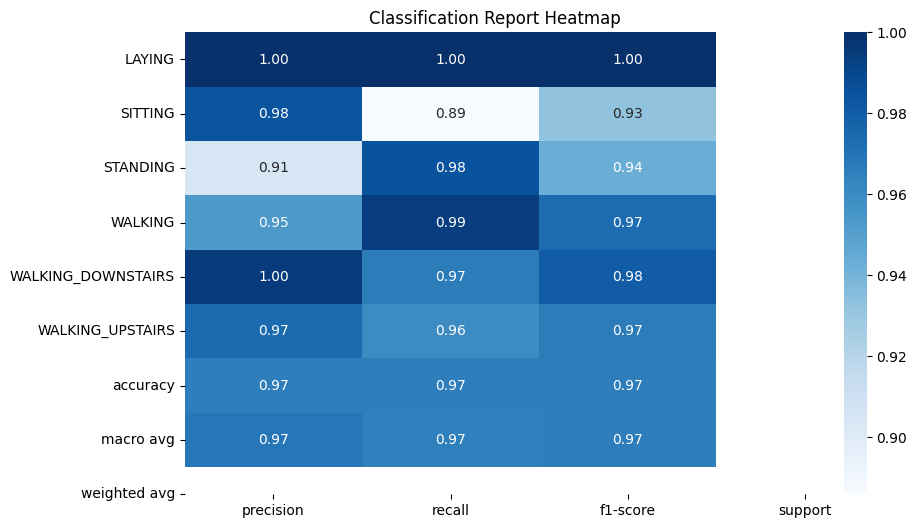

In [29]:
# Assuming you have label_encoder and y_test is already encoded
target_names = list(map(str, label_encoder.classes_))  # Get the target names as strings

# Classification Report
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

# Convert report to DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Plotting Classification Report Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', xticklabels=report_df.columns, yticklabels=report_df.index)
plt.title('Classification Report Heatmap')
plt.show()


In [30]:
# Save the entire model
model.save('human_activity_recognition_model.h5')
